In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

In [2]:
img_orig = cv2.imread('data/032.jpg')

In [3]:
cv2.namedWindow('original',cv2.WINDOW_NORMAL)
cv2.imshow('original',img_orig)
cv2.waitKey()
cv2.destroyAllWindows()

### Scanning

#### 1. Resize the image and set aspect ratio

In [4]:
def resizer(image,width=500):
    # get widht and height
    h,w,c = image.shape
    
    height = int((h/w)* width )
    size = (width,height)
    image = cv2.resize(image,(width,height))
    return image, size

In [5]:
img_re,size = resizer(img_orig)
print(size)
cv2.imshow('Resize',img_re)
cv2.waitKey()
cv2.destroyAllWindows()

(500, 647)


#### 2. Image Processing
1. Enhance
2. Grayscale
3. Blur
4. Edge Detect
5. Morphological transform
6. Countors
7. Find Four Points


In [6]:
detail = cv2.detailEnhance(img_re,sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
blur = cv2.GaussianBlur(gray,(5,5),0)
# edge detect
edge_image = cv2.Canny(blur,75,200)
# morphological transform
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(edge_image,kernel,iterations=1)
closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

### document scanner function

In [7]:
def document_scanner(image):

    img_re,size = resizer(image)
    detail = cv2.detailEnhance(img_re,sigma_s = 20, sigma_r = 0.15)
    gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
    blur = cv2.GaussianBlur(gray,(5,5),0)
  
    return img_re,size

In [10]:
img = cv2.imread('./data/032.jpg')
wrpimg,edgeimg = document_scanner(img)

In [11]:
cv2.imshow('original',img)
cv2.imshow('wrap',img_re)
cv2.waitKey()
cv2.destroyAllWindows()

### Magic Color

In [12]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [13]:
rgb = cv2.cvtColor(wrpimg,cv2.COLOR_BGR2RGB)
magic_image = apply_brightness_contrast(rgb,120,0)
magic_image_c1 = apply_brightness_contrast(rgb,0,40)
magic_image_c2 = apply_brightness_contrast(rgb,50,40)

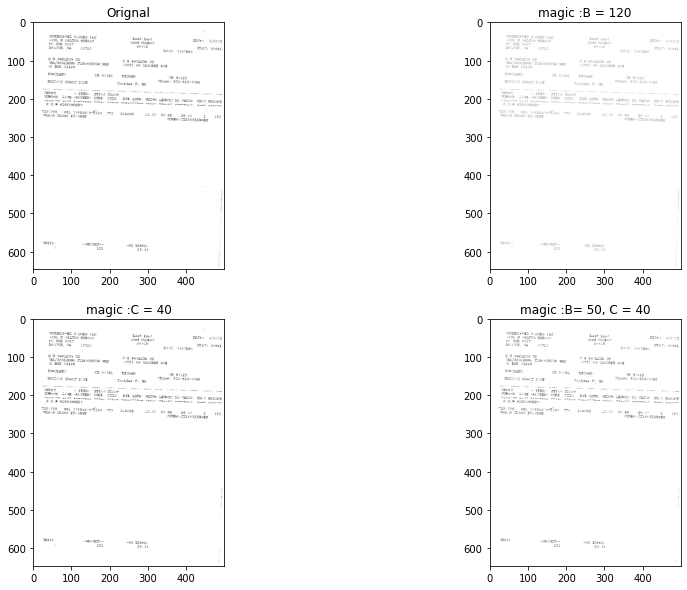

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title('Orignal')

plt.subplot(2,2,2)
plt.imshow(magic_image)
plt.title('magic :B = 120')

plt.subplot(2,2,3)
plt.imshow(magic_image_c1)
plt.title('magic :C = 40')


plt.subplot(2,2,4)
plt.imshow(magic_image_c2)
plt.title('magic :B= 50, C = 40')

plt.show()

### Predictions

In [34]:
import predictions as pred

In [35]:
img_bb, results = pred.getPredictions(magic_image_c2)

Ga btnaccess Beyond the Network Limited Jimit Gandhi 20th Floor, East Exchange Tower APEMEA 38 Leighton Road Causeway Bay, Hong Kong © 91 22 5651 0827 91 22 5651 0826 91 98 2074 4226 igandhi@btnaccess.com ompalny www.btnaccess.com A POCW comp


In [36]:
cv2.namedWindow('prediction',cv2.WINDOW_NORMAL)
cv2.imshow('prediction',img_bb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
results

{'NAME': [],
 'ORG': ['Limited'],
 'DES': [],
 'PHONE': ['912256510827912256510826', '919820744226'],
 'EMAIL': ['igandhi@btnaccess.com'],
 'WEB': ['www.btnaccess.com']}